## Это пример использования библиотеки pyFFS 

Пример отсюда: https://github.com/imagingofthings/pyFFS/tree/master/examples

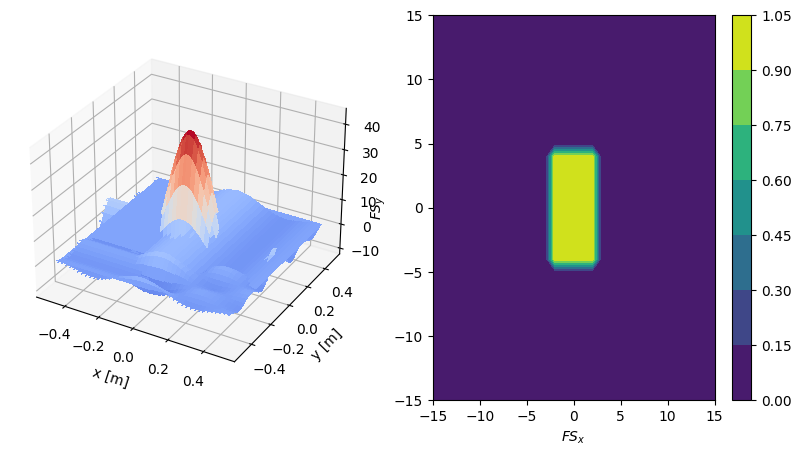

In [2]:
import numpy as np
from pyffs import ffsn_sample, ffsn
from pyffs.func import dirichlet_2D
import matplotlib.pyplot as plt
from matplotlib import cm
import pathlib as plib
# from util import plotting_setup

# fig_path = plotting_setup()


T = [1, 1]
T_c = [0, 0]
N_FS = [5, 9]
N_s = [256, 256]
K_plot = [15, 15]

sample_points, _ = ffsn_sample(T=T, N_FS=N_FS, T_c=T_c, N_s=N_s, mod=np)
diric_samples = dirichlet_2D(sample_points, T, T_c, N_FS)
diric_FS = ffsn(x=diric_samples, T=T, N_FS=N_FS, T_c=T_c)[: N_FS[0], : N_FS[1]]

# plot time
fig = plt.figure(num="dirichlet 2D", figsize=(10, 5))
ax_spat = fig.add_subplot(1, 2, 1, projection="3d")
X, Y = np.meshgrid(sample_points[0], sample_points[1])
ax_spat.plot_surface(X, Y, diric_samples.T, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax_spat.set_xlabel("x [m]")
ax_spat.set_ylabel("y [m]")

# plot frequency
Kx = N_FS[0] // 2
Ky = N_FS[1] // 2
FS = np.zeros(np.array(K_plot) * 2 + 1, dtype=complex)
fsx_off = K_plot[0] - Kx
fsy_off = K_plot[1] - Ky
FS[fsx_off : fsx_off + N_FS[0], fsy_off : fsy_off + N_FS[1]] = diric_FS

ax_freq = fig.add_subplot(1, 2, 2)
kx_vals = np.arange(-K_plot[0], K_plot[0] + 1)
ky_vals = np.arange(-K_plot[1], K_plot[1] + 1)
X, Y = np.meshgrid(kx_vals, ky_vals)
cp = ax_freq.contourf(X, Y, np.abs(FS.T))
fig = plt.gcf()
fig.colorbar(cp)
ax_freq.set_xlabel("$FS_x$")
ax_freq.set_ylabel("$FS_y$")

# fig.savefig(plib.Path(fig_path) / "ffs_2d.png")
plt.show()

In [11]:
np.shape(sample_points[1])

(1, 256)

## Это я экспериментирую

In [12]:
import pyffs

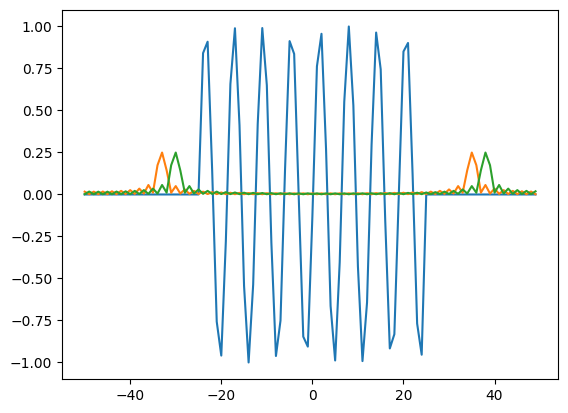

In [49]:
pulse = np.zeros(100)
pulse[25:75] = np.sin(np.arange(50))

spec = pyffs.ffs(pulse, 1, 0, 3)
spec1 = pyffs.ffs(pulse, 1, 0, 9)
plt.plot(np.arange(-50, 50), pulse)
plt.plot(np.arange(-50, 50), np.absolute(spec))
plt.plot(np.arange(-50, 50), np.absolute(spec1))
plt.show()

In [44]:
zeros_spec = np.absolute(spec) < 1e-5
np.sum(zeros_spec)

49